# Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans


# Loading the dataset

In [2]:
df=load_iris()
df=pd.DataFrame(df.data,columns=df.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
df.shape

(150, 4)

In [4]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Standardizing to avoid bias

In [6]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df=sc.fit_transform(df)

# Finding the Optimum number of clusters

In [7]:
cluster_range=range(1,20)
cluster_errors=[]
for i in cluster_range:
    km=KMeans(n_clusters =i,n_init=10)
    km.fit(df)
    labels=km.labels_
    centroids=km.cluster_centers_
    cluster_errors.append(km.inertia_)
clusters_df=pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})  
clusters_df

,num_clusters,cluster_errors
0,1,600.000000
1,2,222.361705
2,3,139.820496
3,4,114.092547
4,5,90.807592
5,6,80.022496
6,7,71.986415
7,8,62.279573
8,9,54.839916
9,10,47.844424


# Plotting elbow curve to observe the pattern of clusters

Text(0.5, 1.0, 'The Elbow Method')

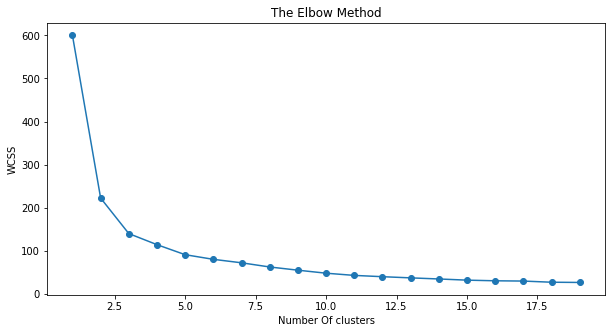

In [8]:
plt.figure(figsize=(10,5))
plt.plot(cluster_range,cluster_errors,marker='o')
plt.xlabel("Number Of clusters")
plt.ylabel("WCSS")
plt.title("The Elbow Method")

Here '3' is the optimul number of clusters.

# Creating the KMeans classifier

In [9]:
model=KMeans(n_clusters=3,max_iter=50)
y_kmeans=model.fit_predict(df)

# Visualising the clusters


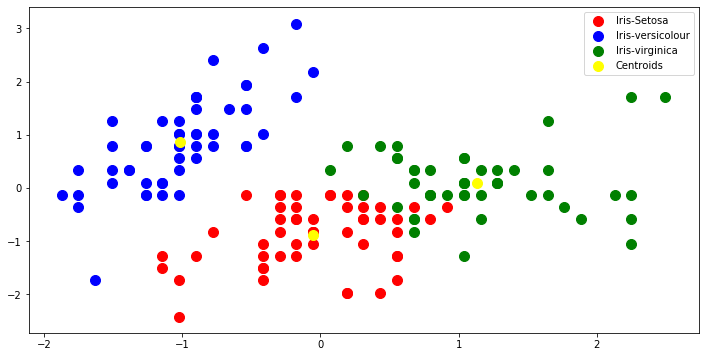

In [16]:
plt.figure(figsize=(12,6))
plt.scatter(df[y_kmeans==0,0],df[y_kmeans==0,1],s=100,c="red",label="Iris-Setosa")
plt.scatter(df[y_kmeans==1,0],df[y_kmeans==1,1],s=100,c="blue",label="Iris-versicolour")
plt.scatter(df[y_kmeans==2,0],df[y_kmeans==2,1],s=100,c="green",label="Iris-virginica")

# plotting the centroids of the clusters
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=100,c="yellow",label="Centroids")
plt.legend()

